<a href="https://colab.research.google.com/github/homata123/GAN_model/blob/main/GAN_tf_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
cd /content/gdrive/My Drive/Kaggle

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Kaggle'
/content


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
#!kaggle competitions download -c generative-dog-images
!kaggle datasets download -d homata123/vnceleb

 99% 631M/638M [00:05<00:00, 131MB/s]
100% 638M/638M [00:05<00:00, 120MB/s]


In [6]:
!unzip vnceleb.zip

Streaming output truncated to the last 5000 lines.
  inflating: VN-celeb/785/21.png     
  inflating: VN-celeb/785/22.png     
  inflating: VN-celeb/785/23.png     
  inflating: VN-celeb/785/24.png     
  inflating: VN-celeb/785/25.png     
  inflating: VN-celeb/785/26.png     
  inflating: VN-celeb/785/27.png     
  inflating: VN-celeb/785/28.png     
  inflating: VN-celeb/785/29.png     
  inflating: VN-celeb/785/3.png      
  inflating: VN-celeb/785/30.png     
  inflating: VN-celeb/785/4.png      
  inflating: VN-celeb/785/5.png      
  inflating: VN-celeb/785/6.png      
  inflating: VN-celeb/785/7.png      
  inflating: VN-celeb/785/8.png      
  inflating: VN-celeb/785/9.png      
  inflating: VN-celeb/786/0.png      
  inflating: VN-celeb/786/1.png      
  inflating: VN-celeb/786/10.png     
  inflating: VN-celeb/786/11.png     
  inflating: VN-celeb/786/2.png      
  inflating: VN-celeb/786/3.png      
  inflating: VN-celeb/786/4.png      
  inflating: VN-celeb/786/5.png      

In [7]:
!cd /content

100%|██████████| 25/25 [00:00<00:00, 4557.04it/s]


Number of samples: 283
(283, 128, 128, 3)
283


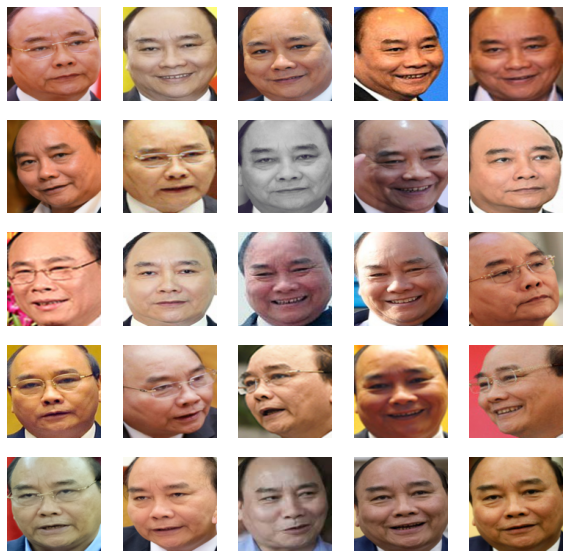

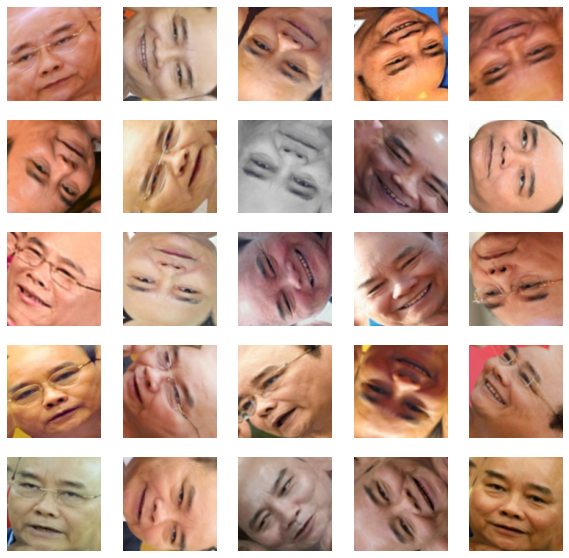

final image data shape: (1132, 128, 128, 3)


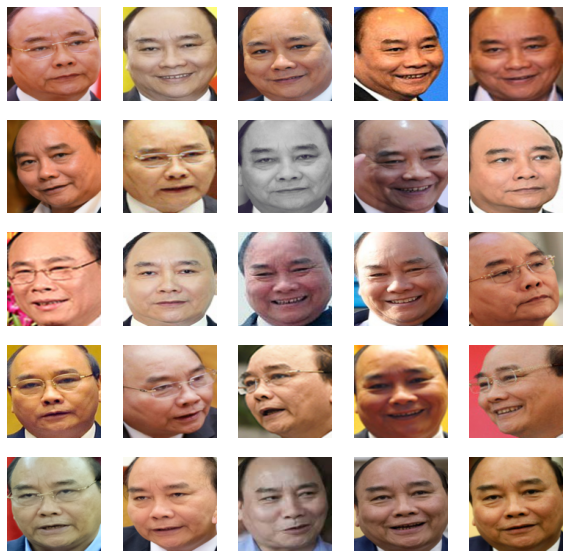

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf



from DiffAugment_tf import DiffAugment
policy = 'color,translation,cutout'
PIC_DIR = f'/content/VN-celeb'
    
from tqdm import tqdm
from PIL import Image

IMAGES_COUNT = 20
#Original size based on given dataset
ORIG_WIDTH = 128
ORIG_HEIGHT = 128
diff = (ORIG_HEIGHT - ORIG_WIDTH) // 2

WIDTH = 128
HEIGHT = 128

crop_rect = (0, diff, ORIG_WIDTH, ORIG_HEIGHT - diff)

ori_images = []
number_of_samples=0
for fold in os.listdir(PIC_DIR)[:IMAGES_COUNT]:
  #for pic_file in tqdm(os.listdir(PIC_DIR)[:IMAGES_COUNT]):
  fold1=os.path.join(PIC_DIR,fold)
  for pic_file in tqdm(os.listdir(fold1)):
      fold2=os.path.join(fold1,pic_file)
      ori_pic=Image.open(fold2)
      if (ori_pic.height==128 and ori_pic.width==128):
        pic = ori_pic.crop(crop_rect)
        pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
        
        ori_images.append(np.uint8(pic))
        number_of_samples+=1
print("Number of samples:",number_of_samples)



ori_images = np.array(ori_images) / 255
print(ori_images.shape)
#
print(ori_images.shape[0])
#

from matplotlib import pyplot as plt


#Code cell <XJuaS7xBEd4C>
# %% [code]

plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(ori_images[i])
    plt.axis('off')
plt.show()

#
# import the necessary packages
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.data import AUTOTUNE
from imutils import paths
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np


#hien thi augmentation voi image dau tien
#tf.keras.preprocessing.image.array_to_img(augment_using_layers(ori_images,aug)[0][0])
#multiple number by our choice,can be 
def augment_using_layers(images, aug):
	# pass a batch of images through our data augmentation pipeline
	# and return the augmented images
	images = aug(images)

	# return the image and the label
	return (images)

aug = tf.keras.Sequential([
			preprocessing.RandomFlip("horizontal_and_vertical"),
			preprocessing.RandomZoom(
				height_factor=(-0.05, -0.15),
				width_factor=(-0.05, -0.15)),
			preprocessing.RandomRotation(0.3)
		])
multiple_number=4
#
plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(augment_using_layers(ori_images,aug)[i])
    plt.axis('off')
plt.show()
#

augment_images=ori_images


for i in range (multiple_number-1):
  augment_images=np.vstack([augment_images,augment_using_layers(ori_images,aug)])


images=augment_images

#images=ori_images

print("final image data shape:",images.shape)
#Code cell <V8Qq_kWLEeaG>
# %% [code]
plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()
from keras import Input
from keras.layers import Dense, Reshape, LeakyReLU, Conv2D, Conv2DTranspose, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import math

LATENT_DIM = 32
CHANNELS = 3


#Code cell <m1NzuOZ4EkZ->
# %% [code]

def create_generator():
    gen_input = Input(shape=(LATENT_DIM, ))

    x = Dense(128 * 16 * 16)(gen_input)
    x = LeakyReLU()(x)
    x = Reshape((16, 16, 128))(x)

    x = Conv2D(256, 5, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(CHANNELS, 7, activation='tanh', padding='same')(x)

    generator = Model(gen_input, x)
    return generator

def create_discriminator():
    disc_input = Input(shape=(HEIGHT, WIDTH, CHANNELS))

    x = Conv2D(256, 3)(disc_input)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Flatten()(x)
    x = Dropout(0.4)(x)

    x = Dense(1, activation='sigmoid')(x)
    discriminator = Model(disc_input, x)

    optimizer = RMSprop(
        lr=.0001,
        clipvalue=1.0,
        decay=1e-8
    )

    discriminator.compile(
        optimizer=optimizer,
        loss='binary_crossentropy'
    )

    return discriminator



generator = create_generator()
discriminator = create_discriminator()
discriminator.trainable = False


#Code cell <z_j5727aEqV_>
# %% [code]

gan_input = Input(shape=(LATENT_DIM, ))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

optimizer = RMSprop(lr=.0001, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=optimizer, loss='binary_crossentropy')


#calculate FID

from scipy import linalg
from scipy.linalg import sqrtm
    



def calculate_fid(real_embeddings, generated_embeddings):
     # calculate mean and covariance statistics
    mu1, sigma1 = real_embeddings.mean(axis=0), np.cov(real_embeddings, rowvar=False)
    mu2, sigma2 = generated_embeddings.mean(axis=0), np.cov(generated_embeddings,  rowvar=False)
     # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = linalg.sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if np.iscomplexobj(covmean):
        covmean = covmean.real
     # calculate score
    small_fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return small_fid
#Code cell <PKTtwEbbEyL2>
# %% [code]

import time
from tqdm import tqdm
from sklearn.decomposition import PCA
import math
pca_dimension=36
pca_dimension_sqrt=int(math.sqrt(pca_dimension))
pca = PCA(n_components=pca_dimension)
iters = 1000
batch_size = 16

RES_DIR = '/content/res2'
FILE_PATH = '%s/generated_%d.png'
if not os.path.isdir(RES_DIR):
    os.mkdir(RES_DIR)

CONTROL_SIZE_SQRT = 6
control_vectors = np.random.normal(size=(CONTROL_SIZE_SQRT**2, LATENT_DIM)) / 2
fid=[]
start = 0
d_losses = []
a_losses = []
images_saved = 0
for step in range(iters):
    start_time = time.time()
    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    generated0 = generator.predict(latent_vectors)

    real0 = images[start:start + batch_size]
    #
    #real=DiffAugment(real0, policy=policy)
    #print(type(real))
    #generated=DiffAugment(generated0, policy=policy)
    #2 lines below for non-diffAugment 
    real=real0
    generated=generated0
    #
    combined_images = np.concatenate([generated, real])

    labels = np.concatenate([np.ones(((batch_size), 1)), np.zeros(((batch_size), 1))])
    labels += .05 * np.random.random(labels.shape)

    d_loss = discriminator.train_on_batch(combined_images, labels)
    d_losses.append(d_loss)

    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    misleading_targets = np.zeros((batch_size, 1))

    a_loss = gan.train_on_batch(latent_vectors, misleading_targets)
    a_losses.append(a_loss)
    
    #
    real_image_embeddings = []
    generated_image_embeddings=[]
    count=int(number_of_samples/batch_size)
    for i in range(len(real0)):
        imagei = real0[i].reshape((1,128,128,3))
        r_embeddings = discriminator.predict(imagei)
        
        real_image_embeddings.extend(r_embeddings)
    
        imagei1 = generated0[i].reshape((1,128,128,3))
        g_embeddings = discriminator.predict(imagei1)
        generated_image_embeddings.extend(g_embeddings)
    
    
    #print("gen",generated_image_embeddings)
    #print("real",real_image_embeddings)
    sqrt_real=int(math.sqrt(len(real_image_embeddings)))
    sqrt_gen=int(math.sqrt(len(generated_image_embeddings)))
    gen_em=np.reshape(generated_image_embeddings,(sqrt_gen,sqrt_gen))
    real_em=np.reshape(real_image_embeddings,(sqrt_real,sqrt_real))    
    #
    start += batch_size
    
    if start > images.shape[0] - batch_size:
        start = 0

    if step % 20 == 19:
        gan.save_weights('/content/drive/MyDrive/gan.h5')

        print('%d/%d: d_loss: %.4f,  a_loss: %.4f.  (%.1f sec)' % (step + 1, iters, d_loss, a_loss, time.time() - start_time))

        control_image = np.zeros((WIDTH * CONTROL_SIZE_SQRT, HEIGHT * CONTROL_SIZE_SQRT, CHANNELS))
        control_generated = generator.predict(control_vectors)
        for i in range(CONTROL_SIZE_SQRT ** 2):
            x_off = i % CONTROL_SIZE_SQRT
            y_off = i // CONTROL_SIZE_SQRT
            control_image[x_off * WIDTH:(x_off + 1) * WIDTH, y_off * HEIGHT:(y_off + 1) * HEIGHT, :] = control_generated[i, :, :, :]
        im = Image.fromarray(np.uint8(control_image * 255))
        im.save(FILE_PATH % (RES_DIR, images_saved))
        images_saved += 1
        fid.append(calculate_fid(real_em,gen_em))
        

plt.figure(1, figsize=(12, 8))
plt.subplot(221)
plt.plot(d_losses)
plt.xlabel('epochs')
plt.ylabel('discriminant losses')
plt.subplot(222)
plt.plot(a_losses)
plt.xlabel('epochs')
plt.ylabel('adversary losses')
plt.show()
plt.subplot(223)
weight_step=[]
for i in range(1,iters):
  if i%20==0 or i==iters-1:

    weight_step.append(i)
plt.plot(weight_step,fid)
plt.xlabel('epochs')
plt.ylabel('FID')
plt.show()
print(fid)
print("FID size",len(fid))

import imageio
import shutil

images_to_gif = []
for filename in os.listdir(RES_DIR):
    images_to_gif.append(imageio.imread(RES_DIR + '/' + filename))
imageio.mimsave('visual.gif', images_to_gif)
shutil.rmtree(RES_DIR)

Image Augmentation (using tf_data_augmentation)


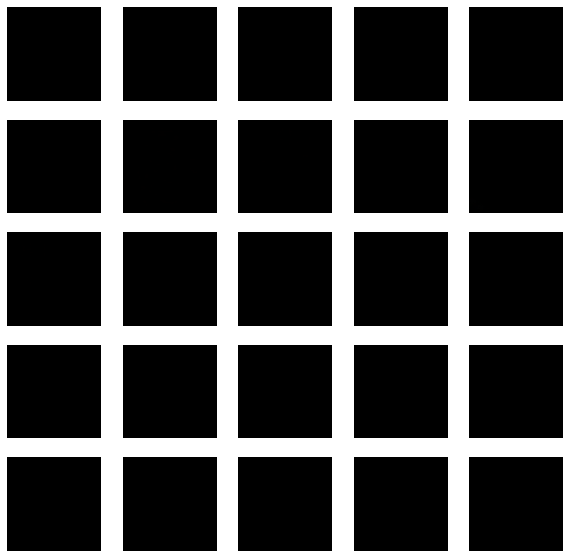

In [ ]:
plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(augment_images[i])
    plt.axis('off')
plt.show()

100%|██████████| 49/49 [00:00<00:00, 907.61it/s]


Number of samples: 49
(49, 128, 128, 3)
49


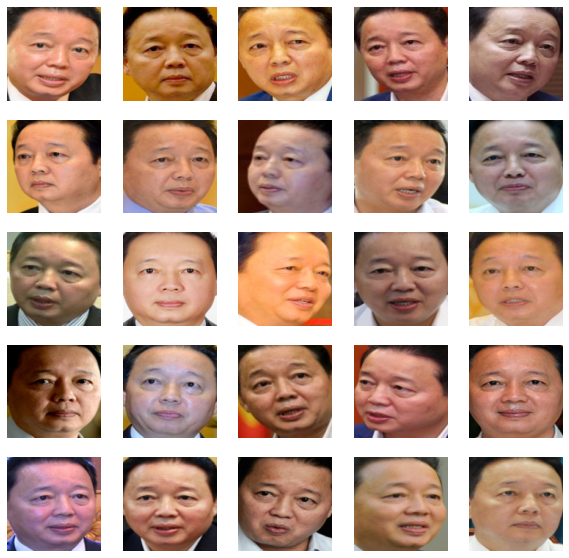

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf



from DiffAugment_tf import DiffAugment
policy = 'color,translation,cutout'
PIC_DIR = f'/content/VN-celeb'
    
from tqdm import tqdm
from PIL import Image

IMAGES_COUNT = 1

ORIG_WIDTH = 128
ORIG_HEIGHT = 128
diff = (ORIG_HEIGHT - ORIG_WIDTH) // 2

WIDTH = 128
HEIGHT = 128

crop_rect = (0, diff, ORIG_WIDTH, ORIG_HEIGHT - diff)

images = []
number_of_samples=0
for fold in os.listdir(PIC_DIR)[:IMAGES_COUNT]:
  #for pic_file in tqdm(os.listdir(PIC_DIR)[:IMAGES_COUNT]):
  fold1=os.path.join(PIC_DIR,fold)
  for pic_file in tqdm(os.listdir(fold1)):
      fold2=os.path.join(fold1,pic_file)
      pic = Image.open(fold2).crop(crop_rect)
      pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
      images.append(np.uint8(pic))
      number_of_samples+=1
print("Number of samples:",number_of_samples)



images = np.array(images) / 255
print(images.shape)
#
print(images.shape[0])
#

from matplotlib import pyplot as plt


#Code cell <XJuaS7xBEd4C>
# %% [code]

plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


In [ ]:
# import the necessary packages
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.data import AUTOTUNE
from imutils import paths
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np

def augment_using_layers(images, aug):
	# pass a batch of images through our data augmentation pipeline
	# and return the augmented images
	images = aug(images)

	# return the image and 
	return (images)

aug = tf.keras.Sequential([
			preprocessing.RandomFlip("horizontal_and_vertical"),
			preprocessing.RandomZoom(
				height_factor=(-0.05, -0.15),
				width_factor=(-0.05, -0.15)),
			preprocessing.RandomRotation(0.3)
		])
print(type(augment_using_layers(images,aug)[0][0]))
#hien thi augmentation voi image dau tien
#tf.keras.preprocessing.image.array_to_img(augment_using_layers(images,aug)[0][0])
#multiple number by our choice,can be customized
multiple_number=4

augment_images=images
for i in range (multiple_number-1):
  augment_images=np.vstack([augment_images,augment_using_layers(images,aug)[0]])
print(augment_images.shape)
plt.figure(1, figsize=(10, 10))
for i in range(49,74):
    plt.subplot(5, 5, i+1-49)
    plt.imshow(augment_images[i])
    plt.axis('off')
plt.show()
#print(augment_using_layers(images,aug)[0].shape)
#for i in images:
  #images.append(tf.keras.preprocessing.image.array_to_img(augment_using_layers(images,aug)[0][i]))
  


<class 'tensorflow.python.framework.ops.EagerTensor'>


ValueError: ignored

In [ ]:
from DiffAugment_tf import rand_cutout
test_pic=images
diffaug_images=[]

for image in test_pic:
  
  diffaug_pic=rand_cutout(image,ratio=0.125)

  diffaug_images.append(diffaug_pic)
diffaug_images=np.array(diffaug_images)
plt.figure(1, figsize=(10, 10))
for i in range(0,25):
    plt.subplot(5, 5, i+1)
    plt.imshow(augment_images[i])
    plt.axis('off')
plt.show()

InvalidArgumentError: ignored

In [ ]:
plt.figure(1, figsize=(12, 8))
plt.subplot(221)
plt.plot(d_losses)
plt.xlabel('epochs')
plt.ylabel('discriminant losses')
plt.subplot(222)
plt.plot(a_losses)
plt.xlabel('epochs')
plt.ylabel('adversary losses')
plt.show()
plt.subplot(223)
weight_step=[]
for i in range(1,iters):
  if i%20==0 or i==iters-1:

    weight_step.append(i)
plt.plot(weight_step,fid)
plt.xlabel('epochs')
plt.ylabel('FID')
plt.show()
print(fid)
print("FID size",len(fid))

NameError: ignored